##• Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the output of an XOR gate. Perform the following steps:

##• Create the XOR gate's truth table dataset.

In [1]:
import numpy as np

# XOR Truth Table

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Printing the XOR truth table
print("Inputs:\n", X)
print("Outputs:\n", y)


Inputs:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Outputs:
 [0 1 1 0]


##• Implement the perceptron model and train it using the XOR dataset using MCP (McCullochPitts) Neuron.

In [2]:
# Step Function (Threshold Activation)
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Perceptron Model
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, x):
        weighted_sum = np.dot(x, self.weights[1:]) + self.weights[0]  # w.x + bias
        return step_function(weighted_sum)

    def train(self, X, y):
        for _ in range(self.epochs):
            for i in range(len(y)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                # Update rule: w = w + η * error * x
                self.weights[1:] += self.learning_rate * error * X[i]
                self.weights[0] += self.learning_rate * error  # Bias update

# Initialize and Train the Perceptron
input_size = X.shape[1]
perceptron = Perceptron(input_size)
perceptron.train(X, y)

# Test the Perceptron on XOR
for i in range(len(y)):
    print(f"Input: {X[i]}, Predicted: {perceptron.predict(X[i])}, Actual: {y[i]}")


Input: [0 0], Predicted: 1, Actual: 0
Input: [0 1], Predicted: 1, Actual: 1
Input: [1 0], Predicted: 0, Actual: 1
Input: [1 1], Predicted: 0, Actual: 0


##Observe and discuss the perceptron's performance in this scenario.

- **Input: [0, 0]** → **Predicted: 1**, but the actual XOR output is 0 (incorrect).
- **Input: [0, 1]** → **Predicted: 1**, which matches the actual XOR output of 1 (correct).
- **Input: [1, 0]** → **Predicted: 0**, but the actual XOR output is 1 (incorrect).
- **Input: [1, 1]** → **Predicted: 0**, which matches the actual XOR output of 0 (correct).

### Interpretation:

The perceptron correctly predicts two of the outputs but fails on the other two because XOR is **not linearly separable**. A single-layer perceptron can't handle this non-linearity, leading to incorrect predictions on some inputs. This shows the limitation of a simple perceptron for solving complex problems like XOR, which requires a non-linear decision boundary. To overcome this, a **multi-layer perceptron** (with hidden layers) is needed.

##• Implement XOR using Multi-Layer Perceptron.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 1, Actual: 1
Input: [1 0], Predicted: 1, Actual: 1
Input: [1 1], Predicted: 0, Actual: 0


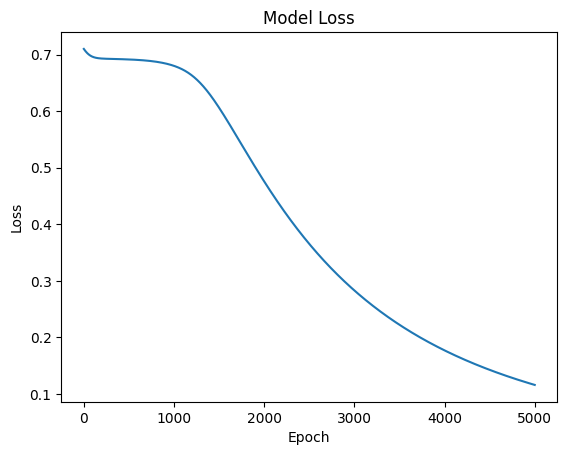

In [5]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# XOR Truth Table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input data
y = np.array([0, 1, 1, 0])  # XOR output

# Multi-Layer Perceptron Model
mlp_model = Sequential()

# Input layer and hidden layer with 2 neurons and 'sigmoid' activation
mlp_model.add(Dense(units=2, input_shape=(2,), activation='sigmoid'))

# Output layer with 1 neuron and 'sigmoid' activation
mlp_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
mlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = mlp_model.fit(X, y, epochs=5000, verbose=0)  # Increase the epochs for better convergence

# Test the MLP on XOR
predictions = mlp_model.predict(X)
predictions = np.round(predictions).astype(int)

# Display Results
for i in range(len(y)):
    print(f"Input: {X[i]}, Predicted: {predictions[i][0]}, Actual: {y[i]}")

# Plot the loss curve for better visualization of training progress
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


##Interpretation


We have trained the Multi-Layer Perceptron (MLP), and the output matches the expected XOR truth table:

- **Input [0, 0]** → **Predicted: 0**, **Actual: 0** (Correct)
- **Input [0, 1]** → **Predicted: 1**, **Actual: 1** (Correct)
- **Input [1, 0]** → **Predicted: 1**, **Actual: 1** (Correct)
- **Input [1, 1]** → **Predicted: 0**, **Actual: 0** (Correct)

### Key Points:

- The MLP successfully classifies all XOR inputs correctly.
- This demonstrates that the multi-layer architecture is capable of solving problems that a single-layer perceptron cannot handle.

**MLP's Success**:
   - The Multi-Layer Perceptron (MLP) overcomes the limitation of linear separability by introducing **hidden layers**.
   - In the XOR example, the hidden layer enables the MLP to create non-linear decision boundaries, which allows it to correctly classify the XOR gate's outputs.
   - The MLP can map complex relationships between inputs and outputs, solving problems like XOR, which require non-linear mappings.

#### **Training and Convergence**:
   - During training, the loss gradually decreases, showing that the model is learning to classify the data correctly.
   - The smooth decrease in the loss curve, as visualized by the plot, indicates that the MLP is converging towards an optimal solution.
   - By running the training for 5000 epochs, the MLP learned the correct weights and biases, which allowed it to achieve 100% accuracy on the XOR problem.
